In [92]:
import warnings
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from scipy import interpolate
import astropy.io.fits as pf
%matplotlib inline

In [87]:
x,y,z = np.loadtxt('temp_fl_xyz.txt', unpack=True)

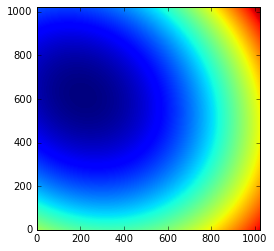

In [90]:
p_init = models.Polynomial2D(degree=2)
fit_p = fitting.LevMarLSQFitter()
p = fit_p(p_init, y, x, z)

plt.imshow(p(yy,xx),origin='lower')

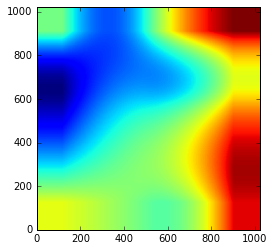

In [93]:
tck = interpolate.bisplrep(y, x, z, kx=2, ky=2, s=16)
test_im = np.zeros((1024,1024))
for i in np.arange(1024):
    for j in np.arange(1024):
        test_im[i,j] = interpolate.bisplev(i, j, tck)
pf.writeto('test.fits',test_im)
plt.imshow(test_im, origin='lower', interpolation='nearest')#, vmin=-1e4, vmax=5e4)

In [101]:
def polyfit2d(x, y, z, order=2):
    ncols = (order + 1)**2
    G = np.zeros((x.size, ncols))
    ij = itertools.product(range(order+1), range(order+1))
    for k, (i,j) in enumerate(ij):
        G[:,k] = x**i * y**j
    m, _, _, _ = np.linalg.lstsq(G, z)
    return m

def polyval2d(x, y, m):
    order = int(np.sqrt(len(m))) - 1
    ij = itertools.product(range(order+1), range(order+1))
    z = np.zeros_like(x)
    for a, (i,j) in zip(m, ij): 
        z += a * x**i * y**j
    return z

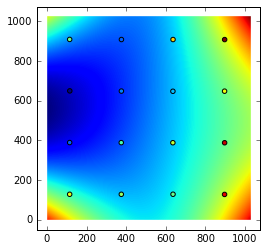

In [103]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Generate Data...
x,y,z = np.loadtxt('temp_fl_xyz.txt', unpack=True)

# Fit a 2nd order, 2d polynomial
m = polyfit2d(x,y,z)

# Evaluate it on a grid...
nx, ny = 1024, 1024
xx, yy = np.meshgrid(np.arange(nx), np.arange(ny))
xx, yy = xx.astype('f'), yy.astype('f')
zz = polyval2d(xx, yy, m)

pf.writeto('test2.fits',zz,clobber=True)

# Plot
plt.imshow(zz, origin='lower')
plt.scatter(x, y, c=z)
plt.show()